In [1]:
import numpy as np
import matplotlib.pyplot as plt

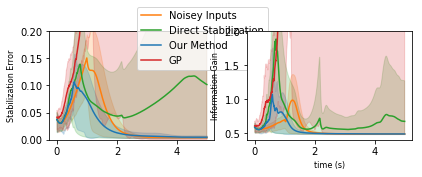

In [5]:
paths = [ 'normal_data2/', 'direct_attempts/','active_learning2/','gp_data/']
labels = [ 'Noisey Inputs', 'Direct Stabilization','Our Method', 'GP']
# paths = ['active_learning/']
colors = ['C1','C2', 'C0','C3']
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [6.5, 2.0]
   }
plt.rcParams.update(params)

fig, ax = plt.subplots(1, 2)

for path, color in zip(paths, colors):
    costs = np.load(path + 'costs.npy')/200
    max_cost = -np.inf
    if path == paths[0]:
        active_learning_costs = costs
        max_idx = None
        for i in range(costs.shape[0]):
            if costs[i,:].max() > max_cost:
                max_cost = costs[i,:].max()
                max_idx = i
active_learning_costs = list(active_learning_costs)
active_learning_costs.pop(max_idx)
active_learning_costs = np.array(active_learning_costs)

for path, color, label in zip(paths, colors, labels):
    costs = np.load(path + 'costs.npy')/200
    xdata = [i/200.0 for i in range(len(costs[0]))]
    if False:
    # if path == paths[0]:
        costs = active_learning_costs
    mean_cost = (np.mean(costs,axis=0))

    ax[0].plot(xdata, mean_cost, color,label=label)

    # ax[0].plot(xdata, costs.T,color)
    ax[0].fill_between(xdata,
                    np.amin(costs,axis=0),#mean_cost-np.std(costs,axis=0),
                    mean_cost+np.std(costs,axis=0),
                    color=color, alpha=0.2)
    ax[0].set_ylim(0,0.2)
    ax[0].set_ylabel('Stabilization Error')
    ax[0].legend(bbox_to_anchor=(0.5, 0.6))
for path, color in zip(paths, colors):
    inf_gains = np.load(path + 'inf_gains.npy')/200
    if False:
    # if path == paths[0]:
        inf_gains = list(inf_gains)
        inf_gains.pop(max_idx)
        inf_gains = np.array(inf_gains)
    xdata = [i/200.0 for i in range(len(costs[0]))]
    mean_inf_gain =(np.mean(inf_gains,axis=0))
    inf_std = np.std(inf_gains,axis=0)
    ax[1].plot(xdata, mean_inf_gain, color)
    # ax[1].plot(xdata, inf_gains.T, color)
    ax[1].fill_between(xdata,
                    np.amin(inf_gains, axis=0),#mean_inf_gain-inf_std,
                    mean_inf_gain+inf_std,
                    color=color, alpha=0.2)
    ax[1].set_ylim(0.4,2.0)
    ax[1].set_xlabel('time (s)')
    ax[1].set_ylabel('Information Gain')
    plt.savefig('monte_carlo.svg')


In [17]:
samples  = np.random.normal(np.array([1,2,3]),0.2,size=(5,3))

In [12]:
np.argmax([1,2,3])

2

In [18]:
samples[2]

array([1.15365834, 2.39646932, 2.79672617])

In [19]:
samples

array([[0.99357935, 2.05662613, 3.00411709],
       [0.77117586, 1.8088914 , 3.16366036],
       [1.15365834, 2.39646932, 2.79672617],
       [1.1321955 , 2.05802735, 2.84760007],
       [1.17140898, 2.2035472 , 2.45093397]])